In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics,preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [61]:
df=pd.read_csv(r"C:\Users\USER\ML_PROJECT\stroke\healthcare-dataset-stroke-data.csv")
test_df=pd.read_csv(r"C:\Users\USER\ML_PROJECT\stroke\healthcare-dataset-stroke-data.csv")

In [62]:
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [64]:
df["id"].value_counts()

16380    1
58061    1
69918    1
23238    1
4807     1
        ..
35085    1
44375    1
5464     1
50522    1
49152    1
Name: id, Length: 5110, dtype: int64

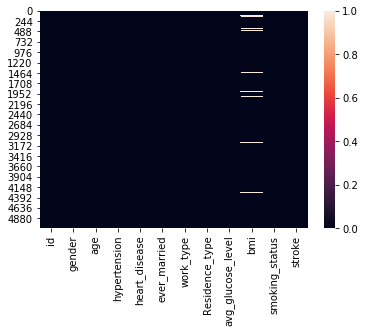

In [65]:
sns.heatmap(df.isnull())

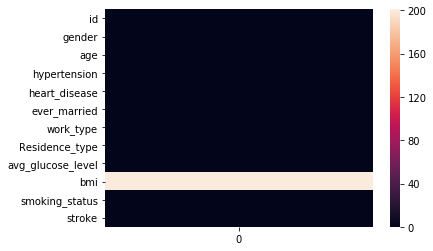

In [66]:
sns.heatmap(df.isnull().sum().to_frame())

In [67]:
df.dropna(axis=0,inplace=True)

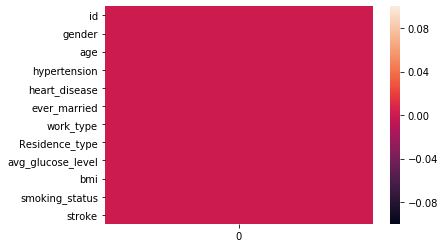

In [68]:
sns.heatmap(df.isnull().sum().to_frame())

In [69]:
print(df["gender"].value_counts())
df.drop(df[df["gender"]=="Other"].index,inplace=True)
print("After removing row")
print(df["gender"].value_counts())

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64
After removing row
Female    2897
Male      2011
Name: gender, dtype: int64


In [70]:
columns=df.columns
columns
for i in columns:
    print("-----------"+i+"-------------")
    print(df[i].value_counts())

-----------id-------------
66786    1
58061    1
69918    1
23238    1
4807     1
        ..
50522    1
54620    1
56669    1
17762    1
49152    1
Name: id, Length: 4908, dtype: int64
-----------gender-------------
Female    2897
Male      2011
Name: gender, dtype: int64
-----------age-------------
57.00    93
78.00    93
52.00    85
54.00    84
55.00    83
         ..
1.40      3
0.16      3
0.08      2
0.48      2
0.40      2
Name: age, Length: 104, dtype: int64
-----------hypertension-------------
0    4457
1     451
Name: hypertension, dtype: int64
-----------heart_disease-------------
0    4665
1     243
Name: heart_disease, dtype: int64
-----------ever_married-------------
Yes    3204
No     1704
Name: ever_married, dtype: int64
-----------work_type-------------
Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
-----------Residence_type-------------
Urban    2490
Rural    2418
Name: Residen

In [71]:
df.drop(df[df["smoking_status"]=="Unknown"].index,inplace=True)


In [72]:
columns=df.columns
columns
for i in columns:
    print("-----------"+i+"-------------")
    print(df[i].value_counts())

-----------id-------------
66786    1
66321    1
27721    1
49929    1
71250    1
        ..
30116    1
40353    1
36255    1
16513    1
49152    1
Name: id, Length: 3425, dtype: int64
-----------gender-------------
Female    2086
Male      1339
Name: gender, dtype: int64
-----------age-------------
54.0    77
57.0    76
78.0    70
51.0    69
52.0    69
        ..
14.0    24
12.0    19
13.0    19
11.0    12
10.0     9
Name: age, Length: 73, dtype: int64
-----------hypertension-------------
0    3017
1     408
Name: hypertension, dtype: int64
-----------heart_disease-------------
0    3219
1     206
Name: heart_disease, dtype: int64
-----------ever_married-------------
Yes    2599
No      826
Name: ever_married, dtype: int64
-----------work_type-------------
Private          2200
Self-employed     629
Govt_job          514
children           68
Never_worked       14
Name: work_type, dtype: int64
-----------Residence_type-------------
Urban    1745
Rural    1680
Name: Residence_type, dty

In [73]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 5108
Data columns (total 12 columns):
id                   3425 non-null int64
gender               3425 non-null object
age                  3425 non-null float64
hypertension         3425 non-null int64
heart_disease        3425 non-null int64
ever_married         3425 non-null object
work_type            3425 non-null object
Residence_type       3425 non-null object
avg_glucose_level    3425 non-null float64
bmi                  3425 non-null float64
smoking_status       3425 non-null object
stroke               3425 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 347.9+ KB


In [75]:
categorical_df=df.select_dtypes(include="object")

In [76]:
categorical_df

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
5,Male,Yes,Private,Urban,formerly smoked
...,...,...,...,...,...
5100,Male,Yes,Self-employed,Rural,never smoked
5102,Female,Yes,Private,Rural,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked


In [77]:
cat_columns=categorical_df.columns

df.drop("id",axis=1,inplace=True)
df.to_csv(r"C:\Users\USER\ML_PROJECT\stroke\cleaned_healthcare-dataset-stroke-data.csv")
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

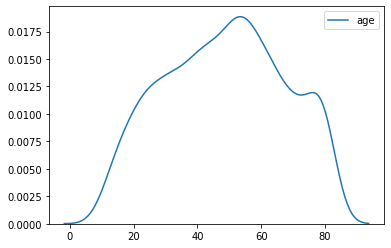

In [78]:
sns.kdeplot(df['age'])

In [79]:
df1=df
df1
li=df.loc[:1,:].values

In [80]:

encoders = {}
for i in cat_columns:
    encoders[i] = preprocessing.LabelEncoder()
    df[i] = encoders[i].fit_transform(df[i])
df



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,0,1
2,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,0,49.0,0,0,1,2,1,171.23,34.4,2,1
4,0,79.0,1,0,1,3,0,174.12,24.0,1,1
5,1,81.0,0,0,1,2,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,1,82.0,1,0,1,3,0,71.97,28.3,1,0
5102,0,57.0,0,0,1,2,0,77.93,21.7,1,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,1,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,1,0


In [81]:
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,0,1
2,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,0,49.0,0,0,1,2,1,171.23,34.4,2,1
4,0,79.0,1,0,1,3,0,174.12,24.0,1,1
5,1,81.0,0,0,1,2,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,1,82.0,1,0,1,3,0,71.97,28.3,1,0
5102,0,57.0,0,0,1,2,0,77.93,21.7,1,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,1,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,1,0


In [82]:

y=df["stroke"]
x=df.drop("stroke",axis=1)
x


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,0
2,1,80.0,0,1,1,2,0,105.92,32.5,1
3,0,49.0,0,0,1,2,1,171.23,34.4,2
4,0,79.0,1,0,1,3,0,174.12,24.0,1
5,1,81.0,0,0,1,2,1,186.21,29.0,0
...,...,...,...,...,...,...,...,...,...,...
5100,1,82.0,1,0,1,3,0,71.97,28.3,1
5102,0,57.0,0,0,1,2,0,77.93,21.7,1
5106,0,81.0,0,0,1,3,1,125.20,40.0,1
5107,0,35.0,0,0,1,3,0,82.99,30.6,1


In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_train


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2501,0,48.0,0,0,1,2,1,113.87,28.9,1
595,0,46.0,0,0,1,2,0,188.11,50.2,2
501,0,60.0,0,0,1,2,1,65.38,41.2,0
2239,0,46.0,0,0,1,2,0,75.09,28.7,1
870,1,49.0,0,0,1,2,0,102.47,29.3,0
...,...,...,...,...,...,...,...,...,...,...
2243,0,49.0,0,0,1,3,0,68.44,23.0,2
1697,1,50.0,0,0,1,2,0,122.48,35.9,2
4214,1,47.0,0,0,1,3,0,90.44,28.7,1
3840,0,14.0,0,0,0,2,1,69.74,24.2,0


In [84]:
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
pred=logistic.predict(x_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [85]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.9369894982497082


In [86]:
print(confusion_matrix(y_test,pred))

[[803   1]
 [ 53   0]]


In [87]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       804
           1       0.00      0.00      0.00        53

    accuracy                           0.94       857
   macro avg       0.47      0.50      0.48       857
weighted avg       0.88      0.94      0.91       857



In [88]:
li1=li[0].tolist()
col=df.columns.tolist()
df2=pd.DataFrame(data=li1)



In [89]:
df3=df2.T
df3.rename(columns={0:"gender",1:"age",2:"hypertension",3:"heart_disease",4:"ever_married",5:"work_type",6:"Residence_type",7:"avg_glucose_level",8:"bmi",9:"smoking_status",10:"stroke"},inplace=True)
df3

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [90]:
for i in cat_columns:
    df3[i]=encoders[i].transform(df3[i])

In [91]:
df3.drop('stroke',axis=1,inplace=True)
df3

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67,0,1,1,2,1,228.69,36.6,0


In [92]:

forest=RandomForestClassifier(n_estimators=200,criterion="entropy")
fore=forest.fit(x_train,y_train)
forest_pred=fore.predict(x_test)

In [93]:
print("Accuracy:",metrics.accuracy_score(y_test, forest_pred))

Accuracy: 0.9381563593932322


In [94]:
print(confusion_matrix(y_test,forest_pred))

[[804   0]
 [ 53   0]]


In [95]:
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       804
           1       0.00      0.00      0.00        53

    accuracy                           0.94       857
   macro avg       0.47      0.50      0.48       857
weighted avg       0.88      0.94      0.91       857



C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [96]:
classifier=AdaBoostClassifier(DecisionTreeClassifier(criterion="gini"),algorithm="SAMME.R",
                         n_estimators=200)
classifier.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [97]:
ada_pred=classifier.predict(x_test)


In [98]:
print(confusion_matrix(y_test,ada_pred))
print(classification_report(y_test,ada_pred))
print("Accuracy:",metrics.accuracy_score(y_test, ada_pred))

[[767  37]
 [ 43  10]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       804
           1       0.21      0.19      0.20        53

    accuracy                           0.91       857
   macro avg       0.58      0.57      0.58       857
weighted avg       0.90      0.91      0.90       857

Accuracy: 0.9066511085180864


In [99]:
fore.predict(df3)


array([1], dtype=int64)

In [100]:
logistic.predict(df3)

array([0], dtype=int64)

In [101]:
classifier.predict(df3)

array([1], dtype=int64)

In [102]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = forest.predict_proba(x_test)
lr_probs = logistic.predict_proba(x_test)
dt_probs = classifier.predict_proba(x_test)

In [103]:
rf_probs = rf_probs[:, 1]
lr_probs = lr_probs[:, 1]
dt_probs=dt_probs[:, 1]

In [104]:


r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
dt_auc = roc_auc_score(y_test, dt_probs)



In [105]:


print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (lr_auc))
print('decision tree: AUROC = %.3f' % (dt_auc))



Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.766
Naive Bayes: AUROC = 0.802
decision tree: AUROC = 0.571


In [106]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

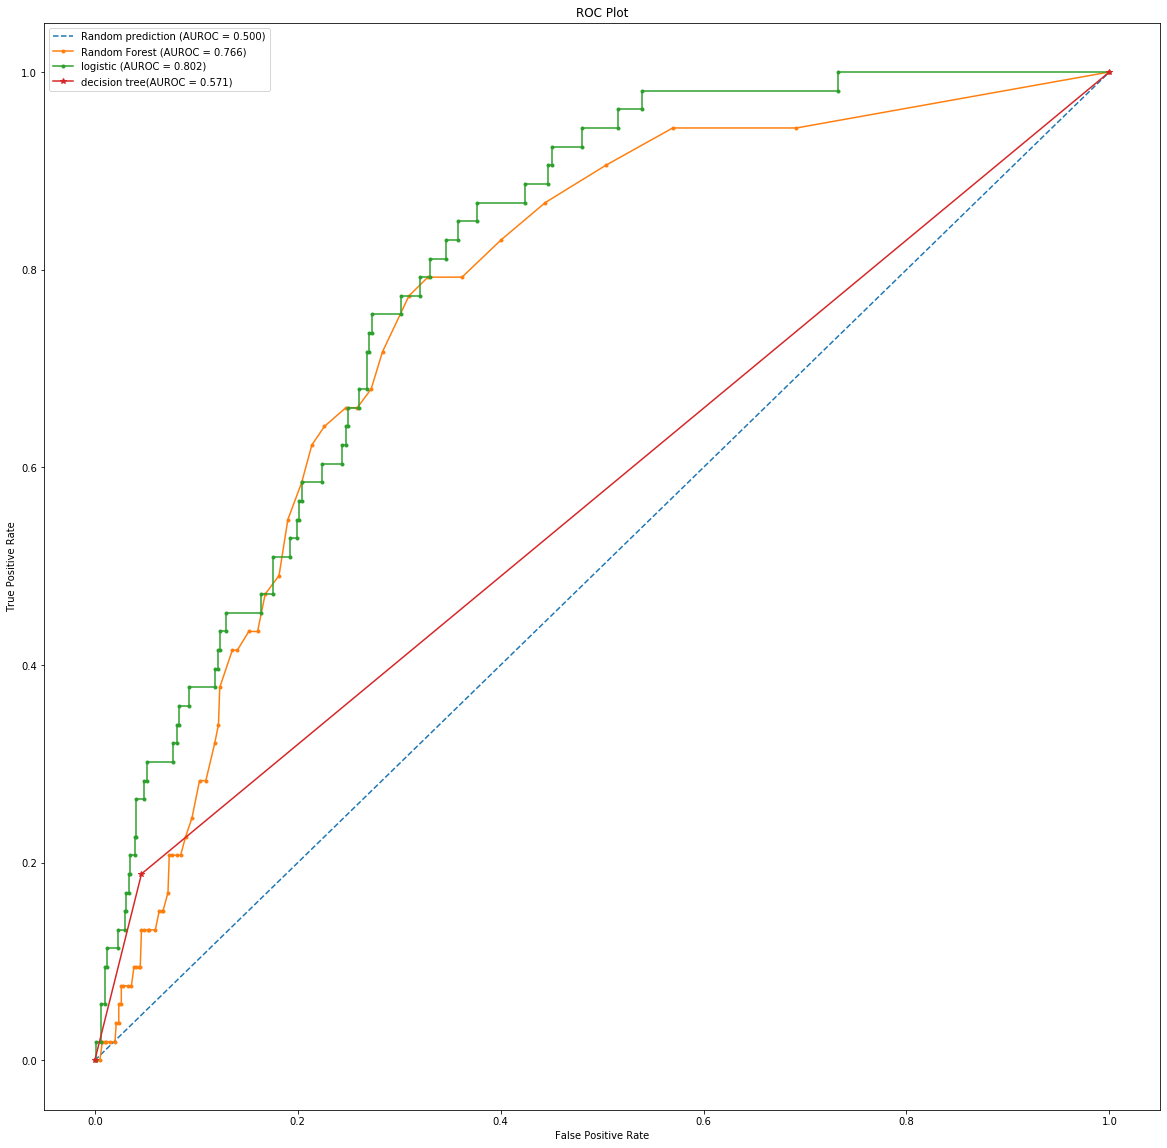

In [107]:
plt.figure(figsize=(20,20))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='logistic (AUROC = %0.3f)' % lr_auc)
plt.plot(dt_fpr, dt_tpr, marker='*', label='decision tree(AUROC = %0.3f)' % dt_auc)

# Title
plt.title('ROC Plot')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [108]:
clf=GridSearchCV(RandomForestClassifier(),{
    "n_estimators":[10,100,200],
    "criterion":["gini","entropy"]
},cv=5,return_train_score=False)
clf.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [109]:
df5=pd.DataFrame(clf.cv_results_)

In [110]:
df5

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023186,0.006998,0.000000,0.000000,gini,10,"{'criterion': 'gini', 'n_estimators': 10}",0.945631,0.943580,0.947368,0.949318,0.949318,0.947040,0.002211,5
1,0.186784,0.012351,0.013816,0.003638,gini,100,"{'criterion': 'gini', 'n_estimators': 100}",0.949515,0.947471,0.949318,0.953216,0.949318,0.949766,0.001878,1
2,0.354135,0.018435,0.020105,0.004760,gini,200,"{'criterion': 'gini', 'n_estimators': 200}",0.947573,0.945525,0.951267,0.953216,0.951267,0.949766,0.002800,1
3,0.026301,0.006405,0.000000,0.000000,entropy,10,"{'criterion': 'entropy', 'n_estimators': 10}",0.943689,0.943580,0.941520,0.949318,0.947368,0.945093,0.002829,6
4,0.204447,0.011544,0.013709,0.004819,entropy,100,"{'criterion': 'entropy', 'n_estimators': 100}",0.947573,0.947471,0.951267,0.951267,0.951267,0.949766,0.001836,1
5,0.387006,0.023405,0.020162,0.002395,entropy,200,"{'criterion': 'entropy', 'n_estimators': 200}",0.947573,0.945525,0.953216,0.951267,0.951267,0.949766,0.002800,1


In [111]:
clf_svm=GridSearchCV(svm.SVC(gamma="auto"),{
    "C":[1,10,20],
    "kernel":["linear","rbf"]
},cv=5,return_train_score=False)
clf_svm.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 20], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [112]:
df5=pd.DataFrame(clf_svm.cv_results_)

In [113]:
df5

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,25.913530,2.987761,0.002040,0.003154,1,linear,"{'C': 1, 'kernel': 'linear'}",0.949515,0.949416,0.951267,0.951267,0.951267,0.950545,0.000883,1
1,0.191473,0.008123,0.031528,0.004132,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.949515,0.949416,0.947368,0.951267,0.951267,0.949766,0.001444,4
2,36.185587,4.020028,0.001239,0.001013,10,linear,"{'C': 10, 'kernel': 'linear'}",0.949515,0.949416,0.951267,0.951267,0.951267,0.950545,0.000883,1
3,0.229784,0.009125,0.035105,0.001483,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.933981,0.931907,0.937622,0.935673,0.939571,0.935748,0.002684,5
4,37.365733,7.013876,0.003639,0.004504,20,linear,"{'C': 20, 'kernel': 'linear'}",0.949515,0.949416,0.951267,0.951267,0.951267,0.950545,0.000883,1
5,0.205020,0.013283,0.031167,0.000155,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.933981,0.931907,0.937622,0.935673,0.939571,0.935748,0.002684,5


In [114]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred_n=gnb.predict(x_test)
print(confusion_matrix(y_test,pred_n))
print(classification_report(y_test,pred_n))
print("Accuracy:",metrics.accuracy_score(y_test,pred_n))

[[726  78]
 [ 34  19]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       804
           1       0.20      0.36      0.25        53

    accuracy                           0.87       857
   macro avg       0.58      0.63      0.59       857
weighted avg       0.91      0.87      0.89       857

Accuracy: 0.8693115519253208
